# Grafika żółwia dla L-systemów

W tej części przeanalizujemy kilka przykładów innego rekursywnego generowania grafiki opartej na tzw. grafice żółwia. Idea opiera się na wizualizacji pewnej gramatyki formalnej, która produkuje ciągi znaków, które interpretujemy jako instrukcje do rysowania dla rzeczonego żółwia.

In [53]:
def F(state,gra): #narysuj linię w kierunku wynaczonym zmienną angle, z punktu (x,y) i o długości l
    pos=state[0]
    angle=state[1]
    l=state[2]
    x=pos[0]
    y=pos[1]
    xend=x+l*cos(angle)
    yend=y+l*sin(angle)
    draw=line([(x,y),(xend,yend)],axes=False,aspect_ratio=1)
    gra=gra+draw
    return [[xend,yend],angle,l],gra

def f(state,gra): #przesuń się nad płaszczyzną o linię w kierunku wynaczonym zmienną angle, z punktu (x,y) i o długości l
    pos=state[0]
    angle=state[1]
    l=state[2]
    x=pos[0]
    y=pos[1]
    xend=x+l*cos(angle)
    yend=y+l*sin(angle)
    return [[xend,yend],angle,l],gra

def a(state,gra,delta): #obróć się o kąt delta
    pos=state[0]
    angle=state[1]
    l=state[2]
    x=pos[0]
    y=pos[1]
    return [[x,y],angle+delta,l],gra

def ApplyRule(str1,replrule): #zastosowanie reguł ze słownika replrule
    return''.join([replrule[x] for x in str1])

def DrawPatt(str1,state,gra,angle):
    while len(str1) >0:
        s=str1[0]
        schop=str1[1:len(str1)]
        if s=="F":
            state,gra=F(state,gra)
        if s=="f":
            state,gra=f(state,gra)
        if s=="p":
            state,gra=a(state,gra,angle)
        if s=="m":
            state,gra=a(state,gra,-angle)
        str1=schop
    return state,gra

def DrawPatt2(str1,state,gra,angle):
    while len(str1) >0:
        s=str1[0]
        schop=str1[1:len(str1)]
        if s=="F":
            state,gra=F(state,gra)
        if s=="f":
            state,gra=f(state,gra)
        if s=="p":
            state,gra=a(state,gra,angle)
        if s=="m":
            state,gra=a(state,gra,-angle)
        str1=schop
    return gra

## System Kocha

System Kocha to rodzaj gramatyki formalnej, której interpretacja graficzna pozwala wygenerować obraz przypominający słynny płatek Kocha.

In [54]:
#W ten sposób ustalamy gramatykę formalną dla systemu Kocha
axiom="F" 
replrule={"F":"FpFmmFpF", "p":"p","m":"m"}

state0=[[0,0],0,1]
gra0=Graphics()

## Rysowanie L-systemu

Rysowanie L-systemu odbywa się poprzez składanie wielu grafik.

In [55]:
#Iteracje funkcji
def f1(s,n):
    while n>0:
        s,n=ApplyRule(s,replrule),n-1
    return s

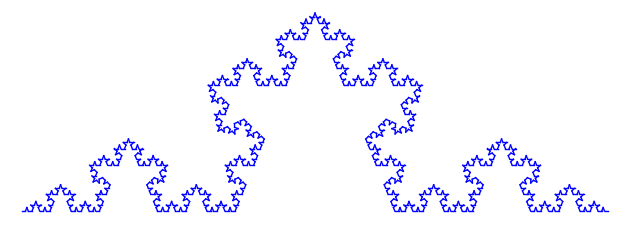

Animation with 5 frames
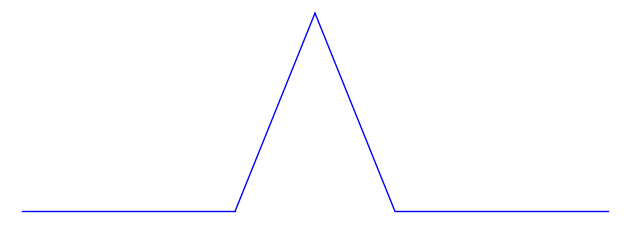

In [56]:
_,qq=DrawPatt(f1(axiom,5),state0,gra0,pi/sqrt(7))
show(qq,axes=False,aspect_ratio=1)

animate([DrawPatt2(f1(axiom,k),state0,gra0,pi/sqrt(7)) for k in [1..5]])

In [32]:
#Przykład ciągu znaków wygenerowanego przez gramatykę w czterech krokach
f1(axiom,4)

'FpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFpFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFpFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFpFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFpFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFpFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFpFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFpFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFpFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFpFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpFpFpFmmFpFpFpFmmFpFmmFpFmmFpFpFpFmmFpF'

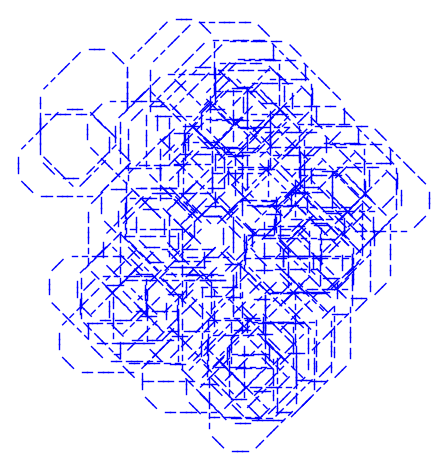

In [57]:
## Inny system (bardzo chaotyczny)
axiom2="F" 
replrule2={"F":"Fmpf","f":"fFF", "p":"m","m":"pp"}

state0=[[0,0],0,1]
gra0=Graphics()
def f2(s,n):
    while n>0:
        s,n=ApplyRule(s,replrule2),n-1
    return s

_,qq=DrawPatt(f2(axiom2,10),state0,gra0,pi/4)
show(qq,axes=False,aspect_ratio=1)

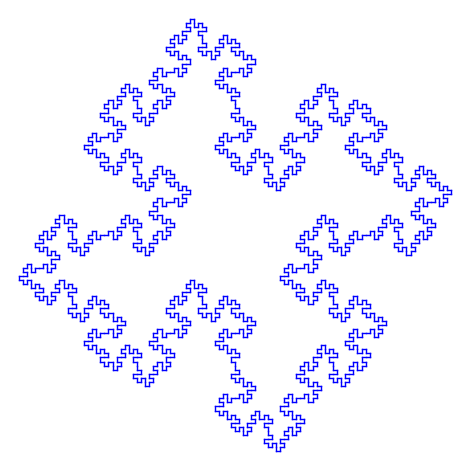

In [58]:
# kwadratowy Koch
axiom3="FpFpFpF" 
replrule3={"F":"FpFmFmFFpFpFmF","p":"p","m":"m"}

state0=[[0,0],0,1]
gra0=Graphics()
def f3(s,n):
    while n>0:
        s,n=ApplyRule(s,replrule3),n-1
    return s
    
_,qq=DrawPatt(f3(axiom3,3),state0,gra0,pi/2)
show(qq,axes=False,aspect_ratio=1)

## Przykład 1: 

Znajdź opis gramatyki formalnej dla [smoczej krzywej](https://en.wikipedia.org/wiki/Dragon_curve) i wygeneruj jej iteracjie.

## Przykład 2: 
Wykonaj podobne zadanie dla wypełniającej [krzywej Peano](https://en.wikipedia.org/wiki/Peano_curve).


## Przykład 3: 

Zmodyfikuj powyższe procedury, aby wygenerować drzewo.

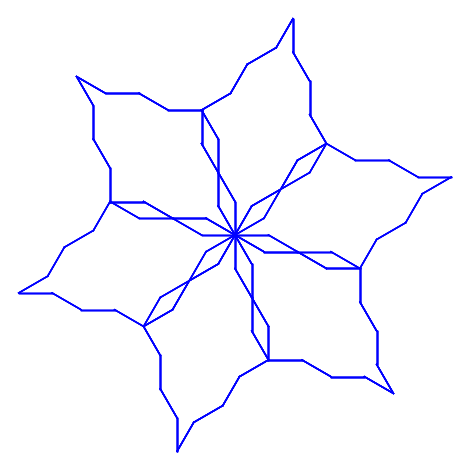

In [59]:
#figura płatka śniegu, jako przykład kształtu, który stabilizuje się w iteracjach (po 8 powtórzeniach)
axiom2="F" 
replrule2={"F":"ppFmF","p":"p","m":"m"}

state0=[[0,0],0,1]
gra0=Graphics()
def f2(s,n):
    while n>0:
        s,n=ApplyRule(s,replrule2),n-1
    return s

_,qq=DrawPatt(f2(axiom2,9),state0,gra0,pi/6)
show(qq,axes=False,aspect_ratio=1)

## Pytanie:

W jaki sposób dodać randomizację do gramatyki formalnej (wskazówka: rozważ dodanie funkcji wyboru w gramatyce).

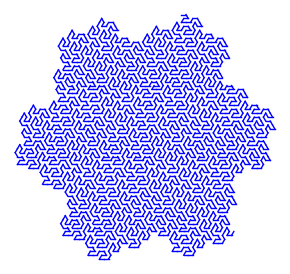

In [60]:
# Krzywa Gospera

def DrawGosp(str1,state,gra,angle):
    while len(str1) >0:
        s=str1[0]
        schop=str1[1:len(str1)]
        if s=="A":
            state,gra=F(state,gra)
        if s=="B":
            state,gra=F(state,gra)
        if s=="+":
            state,gra=a(state,gra,angle)
        if s=="-":
            state,gra=a(state,gra,-angle)
        str1=schop
    return state,gra

axiomGosper="A" 
replruleGosper={"A":"A-B--B+A++AA+B-","B":"+A-BB--B-A++A+B","+":"+","-":"-"}

state0=[[0,0],0,1]
gra0=Graphics()
def f2(s,n):
    while n>0:
        s,n=ApplyRule(s,replruleGosper),n-1
    return s

_,qq=DrawGosp(f2(axiomGosper,4),state0,gra0,pi/3)
show(qq,axes=False,aspect_ratio=1,figsize=[3,3])

In [5]:
f2(axiomGosper,1)

'A-B--B+A++AA+B-'

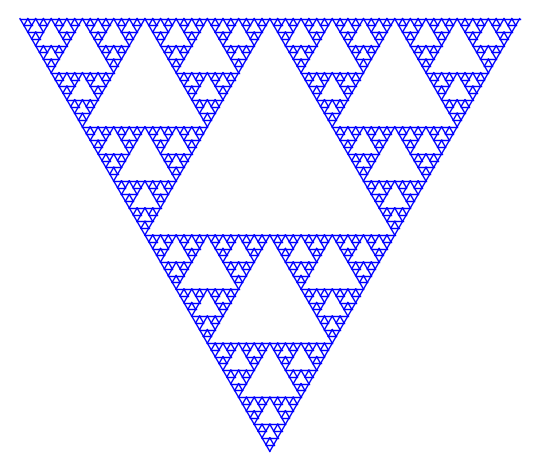

In [61]:
#Trójkąt Sierpinskiego

def DrawSierp(str1,state,gra,angle):
    while len(str1) >0:
        s=str1[0]
        schop=str1[1:len(str1)]
        if s=="F":
            state,gra=F(state,gra)
        if s=="G":
            state,gra=F(state,gra)
        if s=="+":
            state,gra=a(state,gra,angle)
        if s=="-":
            state,gra=a(state,gra,-angle)
        str1=schop
    return state,gra

axiomSierp="F-G-G" 
replruleSierp={"F":"F-G+F+G-F","G":"GG","+":"+","-":"-"}

state0=[[0,0],0,1]
gra0=Graphics()
def f2(s,n):
    while n>0:
        s,n=ApplyRule(s,replruleSierp),n-1
    return s

_,qq=DrawSierp(f2(axiomSierp,6),state0,gra0,2*pi/3)
show(qq,axes=False,aspect_ratio=1)

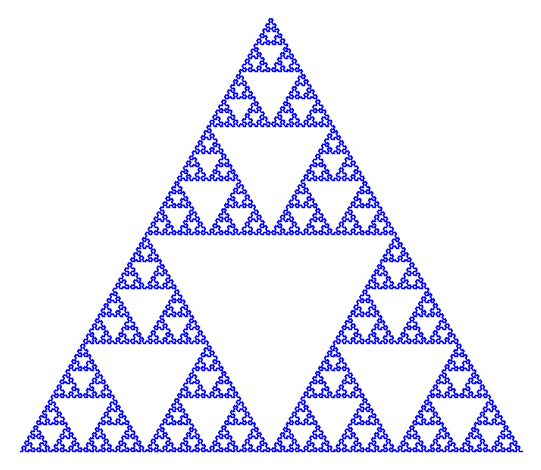

In [62]:
#Trójkąt Sierpinskiego 2

def DrawSierp2(str1,state,gra,angle):
    while len(str1) >0:
        s=str1[0]
        schop=str1[1:len(str1)]
        if s=="A":
            state,gra=F(state,gra)
        if s=="B":
            state,gra=F(state,gra)
        if s=="+":
            state,gra=a(state,gra,angle)
        if s=="-":
            state,gra=a(state,gra,-angle)
        str1=schop
    return state,gra

axiomSierp2="A" 
replruleSierp2={"A":"B-A-B","B":"A+B+A","+":"+","-":"-"}

state0=[[0,0],0,1]
gra0=Graphics()
def f2(s,n):
    while n>0:
        s,n=ApplyRule(s,replruleSierp2),n-1
    return s

_,qq=DrawSierp2(f2(axiomSierp2,8),state0,gra0,pi/3)
show(qq,axes=False,aspect_ratio=1)